# Plotting functions
based on [official tutorial](http://seaborn.pydata.org/tutorial/distributions.html)
## Visualizing the distribution of a dataset

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, 'distributions')))

# list available fonts: [f.name for f in matplotlib.font_manager.fontManager.ttflist]
plt.rc('font', family='DejaVu Sans') 

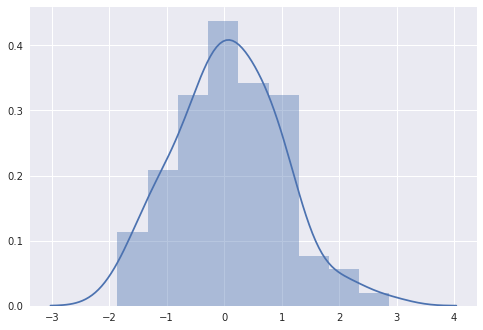

In [3]:
x = np.random.normal(size=100)
ax = sns.distplot(x)

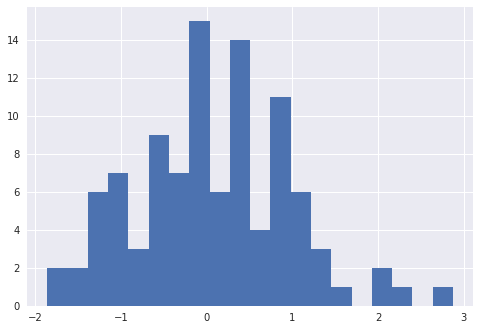

In [4]:
ax = plt.hist(x, bins=20)

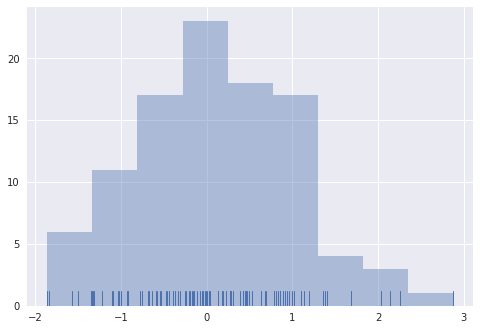

In [5]:
ax = sns.distplot(x, kde=False, rug=True)

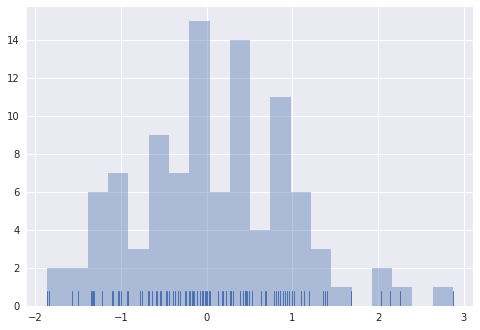

In [6]:
ax = sns.distplot(x, bins=20, kde=False, rug=True)

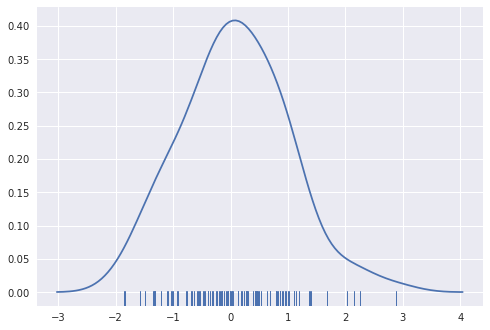

In [7]:
ax = sns.distplot(x, hist=False, rug=True)

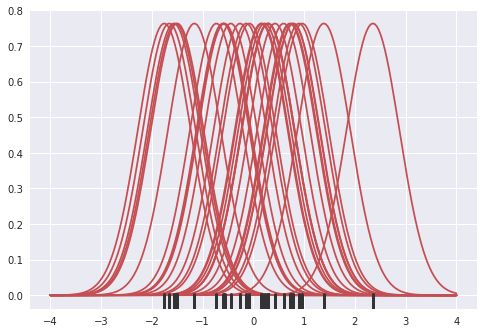

In [8]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color='r')

ax = sns.rugplot(x, color='.2', linewidth=3)

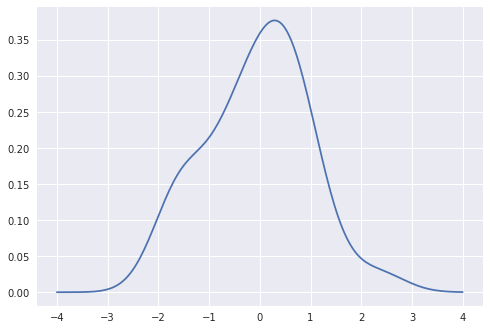

In [9]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
ax = plt.plot(support, density)

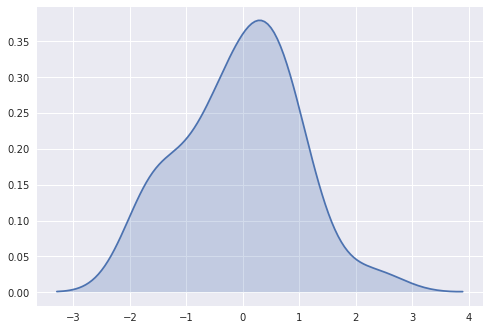

In [10]:
sns.kdeplot(x, shade=True);

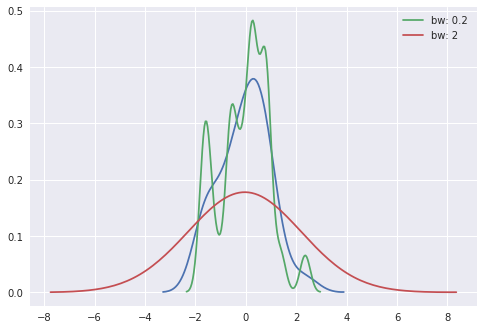

In [14]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label='bw: 0.2')
sns.kdeplot(x, bw=2, label='bw: 2')
plt.legend();

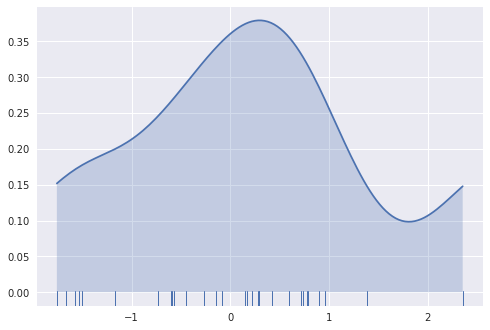

In [21]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

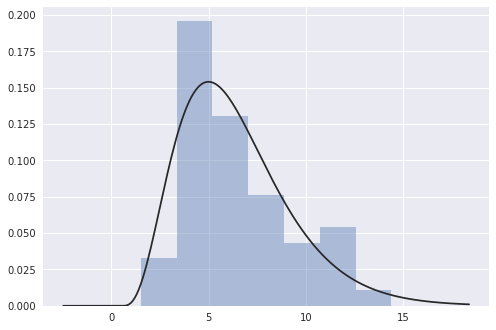

In [24]:
x = np.random.gamma(6, size=50)
sns.distplot(x, kde=False, fit=stats.gamma);

## Plotting bivariate distributions

In [26]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])

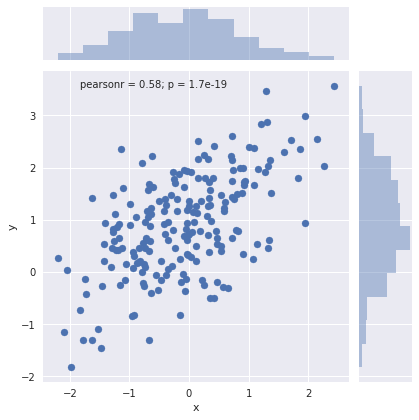

In [28]:
sns.jointplot(x='x', y='y', data=df);

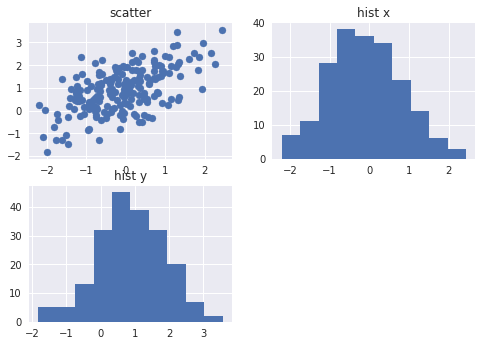

In [60]:
plt.subplot(221)
plt.scatter(x=data[:,0], y=data[:,1])
plt.title('scatter')
plt.subplot(222)
plt.hist(data[:,0])
plt.title('hist x')
plt.subplot(223)
plt.hist(data[:,1])
plt.title('hist y');

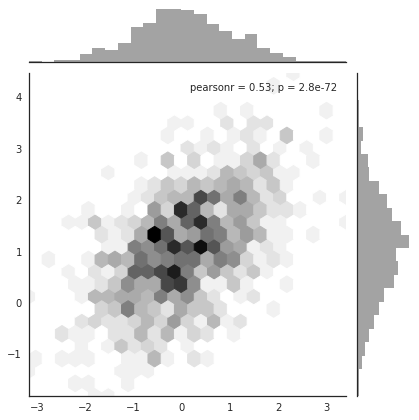

In [64]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    plt.rc('font', family='DejaVu Sans')
    sns.jointplot(x=x, y=y, kind="hex", color="k");

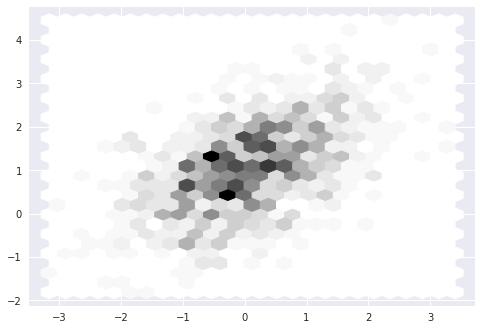

In [70]:
plt.hexbin(x, y, gridsize=25);

# TODO: Make aspect ration similar for both axes? (remove squeezing of figure)

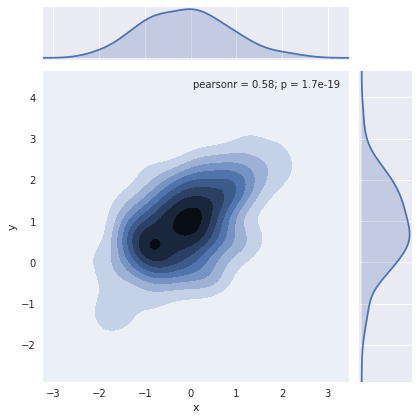

In [72]:
sns.jointplot(x='x', y='y', data=df, kind="kde");

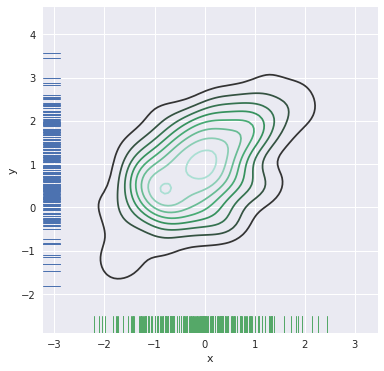

In [73]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

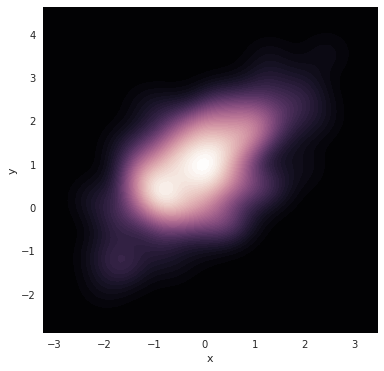

In [74]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

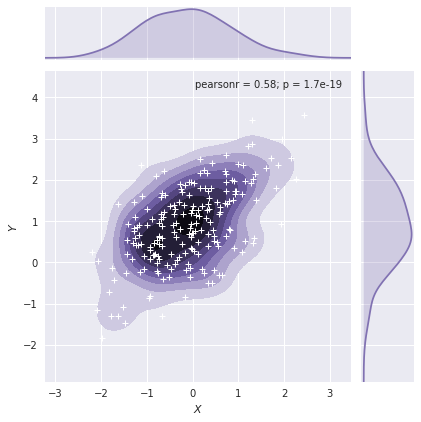

In [80]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

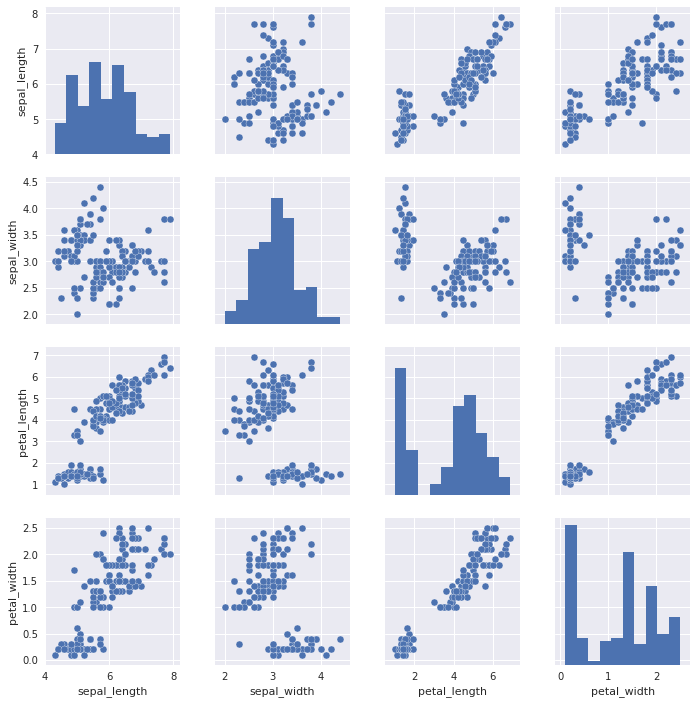

In [81]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


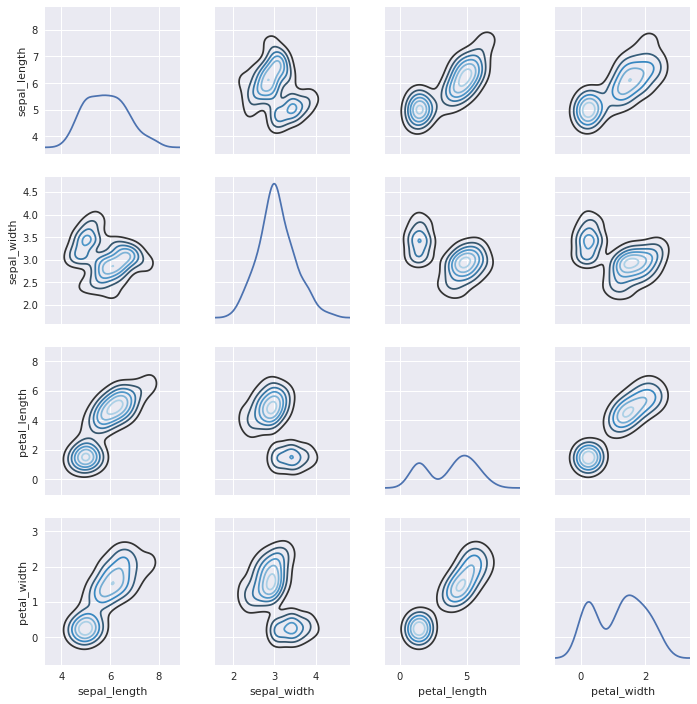

In [82]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);